In [149]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('/Users/nik/Dropbox/Repos/notebooks/thesisrc.py')
mpl.rcParams['figure.figsize'] = (8.0, 6.0)
import numpy as np
import pandas as pd
from igor.binarywave import Waves
from scipy.interpolate import interp1d

In [150]:
cd '/Users/nik/Data/magnet_cernox_calibration'

/Users/nik/Data/magnet_cernox_calibration


In [151]:
# data set 1
diode = Waves('dat0diode.ibw').y
fourk = Waves('dat0fourk.ibw').y
cernox = Waves('dat0cernox.ibw').y

df1 = pd.DataFrame({'Diode':diode, '4K':fourk, 'Cernox':cernox})
df1.sort('Cernox', inplace=True)
grouped1 = df1.groupby('Cernox', as_index=False).mean()

# data set 2
diode = Waves('dat2diode.ibw').y
fourk = Waves('dat2fourk.ibw').y
cernox = Waves('dat2cernox.ibw').y

df2 = pd.DataFrame({'Diode':diode, '4K':fourk, 'Cernox':cernox})
df2.sort('Cernox', inplace=True)
grouped2 = df2.groupby('Cernox', as_index=False).mean()

# data set 3
diode = Waves('dat3diode.ibw').y
fourk = Waves('dat3fourk.ibw').y
cernox = Waves('dat3cernox.ibw').y

df3 = pd.DataFrame({'Diode':diode, '4K':fourk, 'Cernox':cernox})
df3.sort('Cernox', inplace=True)
grouped3 = df3.groupby('Cernox', as_index=False).mean()

# combine, cutting out some noisy data
df = pd.concat([grouped1, grouped2[grouped2['4K']<4.5], grouped3])
df.sort('Cernox', inplace=True)
grouped = df.groupby('Cernox', as_index=False).mean()

In [152]:
grouped.head()

,Cernox,4K,Diode
0,74.345001,299.306244,0.558900
1,74.346001,299.240326,0.558908
2,74.347000,299.135986,0.558918
3,74.348000,299.302002,0.558898
4,74.348999,299.291351,0.558904


In [153]:
# load diode calibration and interpolate down to 1mV steps
s900 = np.loadtxt('s900_calibration.txt')[:,1:] # [temp, voltage]
step = 0.001
volts = np.arange(s900[0,1], s900[-1,1], step)
get_temps = interp1d(s900[:,1], s900[:,0], kind='cubic')

In [154]:
# now I can feed any measured voltage into get_temps
grouped['T_Diode'] = get_temps(grouped['Diode'])

(100.0, 10000.0)

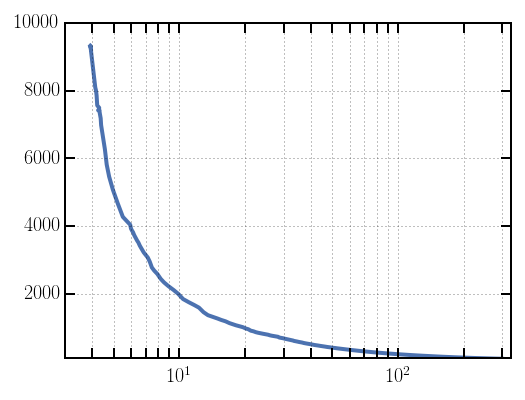

In [248]:
fig, ax = plt.subplots(1,1)
ax.plot(grouped['T_Diode'], grouped['Cernox'])
ax.set_xscale('log')
# ax.set_yscale('log')
ax.grid(which='both')
ax.set_xlim(3,330)
ax.set_ylim(1e2,1e4)

Now that I have that, I can take a guess that this is a CX-1070 from Lakeshore. http://www.lakeshore.com/Documents/CX_RSDSsm.pdf

In [257]:
temps = np.linspace(np.log10(3.92), np.log10(299), 200)
temps = 10**temps
get_cernox = interp1d(grouped['T_Diode'], grouped['Cernox'], kind='linear')
resistances = get_cernox(temps)
nums = np.arange(len(temps))
cernox_calibration = np.vstack((nums+1, np.log10(resistances[::-1]), temps[::-1])).transpose()

(3, 330)

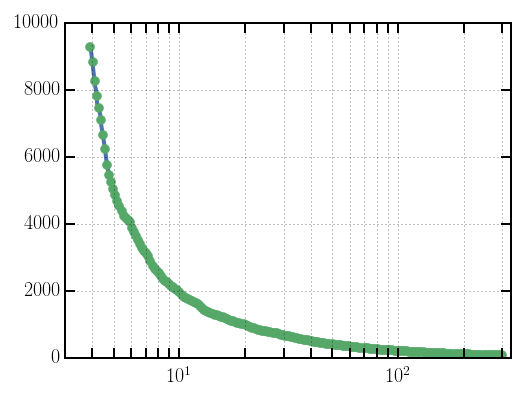

In [258]:
fig, ax = plt.subplots(1,1)
ax.plot(grouped['T_Diode'], grouped['Cernox'])
ax.plot(temps, resistances, '.')
ax.set_xscale('log')
# ax.set_yscale('log')
ax.grid(which='both')
ax.set_xlim(3,330)
# ax.set_ylim(1e2,1e4)

In [259]:
np.savetxt('magnet_cernox_calibration.txt', cernox_calibration, fmt="%.6f", delimiter=',')

In [253]:
grouped['Cernox'].max()

9331.599609375

In [262]:
resistances[::-1]

array([   74.35963047,    75.76706897,    77.23402195,    78.76218397,
          80.32503289,    81.94320302,    83.58205977,    85.25039988,
          86.99234996,    88.77317907,    90.60492593,    92.46560619,
          94.37436855,    96.30630215,    98.33513379,   100.36175214,
         102.47817288,   104.66129452,   106.87006527,   109.13066883,
         111.41426571,   113.79257953,   116.18474986,   118.62612799,
         121.13032114,   123.74824059,   126.33595726,   129.03286496,
         131.72535496,   134.48324727,   137.32738965,   140.218453  ,
         143.18522859,   146.23556901,   149.33942025,   152.42174322,
         155.63558825,   158.94739684,   162.23297044,   165.65316052,
         169.05191974,   172.59005864,   176.1375847 ,   179.74235671,
         183.55106928,   187.2851428 ,   191.10842438,   195.07544964,
         199.24311613,   203.43665011,   207.62906172,   211.96357216,
         216.34721326,   220.84446608,   225.44977509,   230.15516951,
      